# 7.2.2-Functional API

In [1]:
from tensorflow import keras
from keras import layers

In [2]:
inputs = keras.Input(shape=(3,), name='my_input')
features = layers.Dense(64, activation='relu')(inputs)
outputs = layers.Dense(10, activation='softmax')(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
inputs = keras.Input(shape=(3,), name='my_input')

In [4]:
inputs

<KerasTensor shape=(None, 3), dtype=float32, sparse=None, name=my_input>

In [5]:
inputs.shape

(None, 3)

In [6]:
inputs.dtype

'float32'

In [7]:
features = layers.Dense(64, activation='relu', name='features_layer')(inputs)

In [8]:
features

<KerasTensor shape=(None, 64), dtype=float32, sparse=False, name=keras_tensor_2>

In [9]:
features.shape

(None, 64)

In [10]:
features.dtype

'float32'

In [11]:
outputs = keras.layers.Dense(10, activation='softmax', name='output_layer')(features)

In [12]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [13]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)                │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ features_layer (Dense)               │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

### Multi input multi output functional model

In [14]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

In [15]:
# Define model inputs
title = keras.Input(shape=(vocabulary_size, ), name = 'title')
text_body = keras.Input(shape=(vocabulary_size, ), name='text_body')
tags = keras.Input(shape=(num_tags, ), name='tags')

In [16]:
# Combine input features into a single tensor, features, by concatenating them.
features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation='relu')(features)

In [17]:
priority = layers.Dense(1, activation='sigmoid', name='priority')(features)
department = layers.Dense(
    num_departments, activation='softmax', name='department'
)(features)

In [18]:
model = keras.Model(inputs=[title, text_body, tags],
                   outputs=[priority, department])

In [19]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ title (InputLayer)            │ (None, 10000)             │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ text_body (InputLayer)        │ (None, 10000)             │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ tags (InputLayer)             │ (None, 100)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 20100)             │               0 │ title[0][0],               │
│                               │                           │                 │ text_body[0][0],           │
│                               │                           │                 │ tags[0][0]                 │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 64)                │       1,286,464 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ priority (Dense)              │ (None, 1)                 │              65 │ dense_2[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ department (Dense)            │ (None, 4)                 │             260 │ dense_2[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 1,286,789 (4.91 MB)

 Trainable params: 1,286,789 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

### Training a multi input multi output model

In [20]:
import numpy as np

In [21]:
num_samples = 1280

In [22]:
# Dummy input data
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

In [23]:
# Dummy target data
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

In [24]:
model.compile(optimizer='rmsprop',
             loss=['mean_squared_error', 'categorical_crossentropy'],
             metrics=[['mean_absolute_error'], ['accuracy']])

In [25]:
model.fit([title_data, text_body_data, tags_data],
         [priority_data, department_data],
         epochs=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - department_accuracy: 0.2713 - loss: 33.8935 - priority_mean_absolute_error: 0.4832 


In [26]:
model.evaluate([title_data, text_body_data, tags_data],
              [priority_data, department_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - department_accuracy: 0.5750 - loss: 11.3139 - priority_mean_absolute_error: 0.5115 


[11.367548942565918, 0.5757812261581421, 0.5014951825141907]

In [27]:
priority_preds, department_preds = model.predict(
    [title_data, text_body_data, tags_data]
)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


### providing dict of input and target arrays

In [28]:
model.compile(optimizer='rmsprop',
             loss={'priority': 'mean_squared_error', 'department': 'categorical_crossentropy'},
             metrics={'priority': ['mean_absolute_error'], 'department': ['accuracy']})

In [29]:
model.fit({'title': title_data, 'text_body': text_body_data,
          'tags': tags_data},
         {'priority': priority_data, 'department': department_data},
         epochs=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - department_accuracy: 0.3019 - loss: 22.2096 - priority_mean_absolute_error: 0.4941


In [30]:
model.evaluate({'title': title_data, 'text_body': text_body_data,
               'tags': tags_data},
              {'priority': priority_data, 'department': department_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - department_accuracy: 0.2281 - loss: 12.7562 - priority_mean_absolute_error: 0.5115


[12.965405464172363, 0.22812500596046448, 0.5014951825141907]

In [31]:
priority_preds, department_preds = model.predict({
    'title': title_data, 'text_body': text_body_data, 'tags': tags_data
})

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


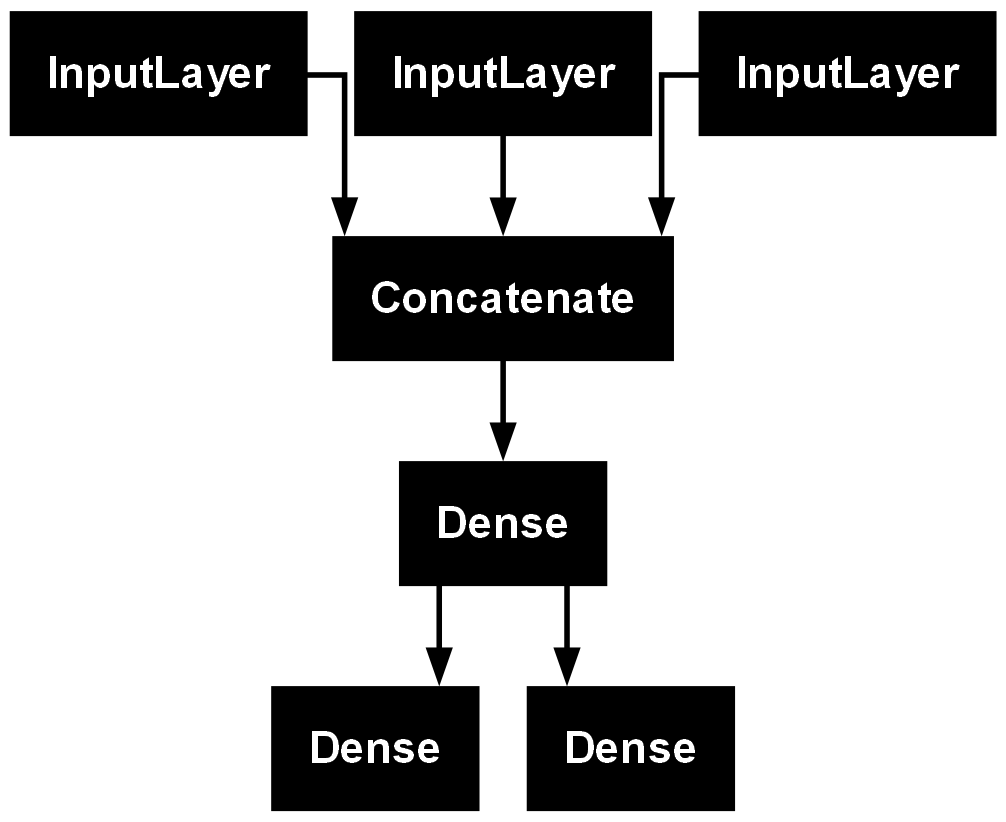

In [33]:
keras.utils.plot_model(model, 'ticket_classifier.png')

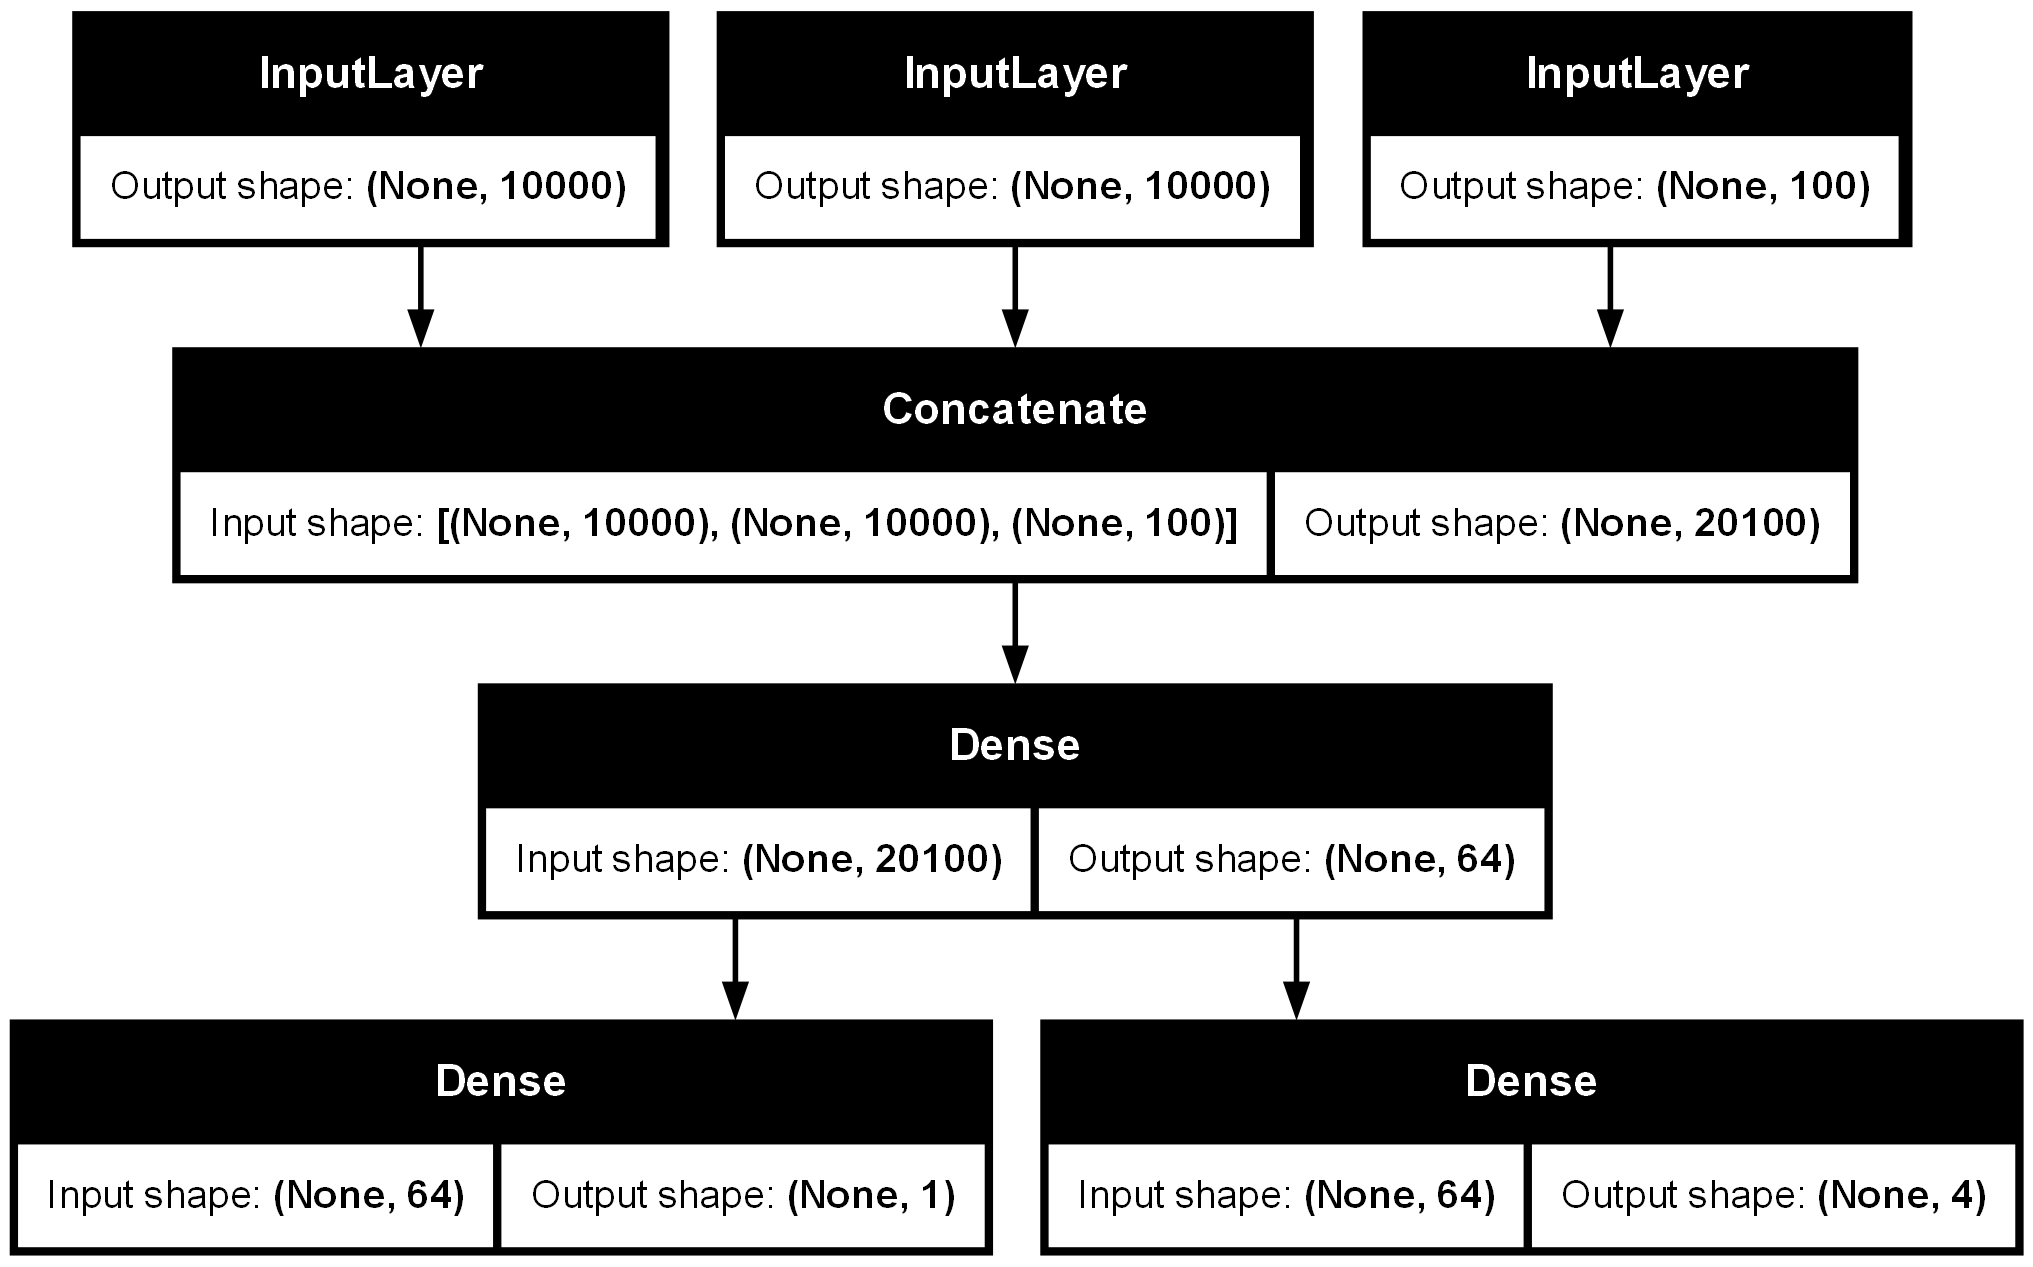

In [34]:
keras.utils.plot_model(model, 'ticket_classifier.png', show_shapes=True)

In [35]:
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]

In [42]:
model.layers[3]

<Concatenate name=concatenate, built=True>

In [36]:
model.layers[3].input

[<KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=title>,
 <KerasTensor shape=(None, 10000), dtype=float32, sparse=None, name=text_body>,
 <KerasTensor shape=(None, 100), dtype=float32, sparse=None, name=tags>]

In [37]:
model.layers[3].output

<KerasTensor shape=(None, 20100), dtype=float32, sparse=False, name=keras_tensor_4>

In [38]:
features = model.layers[4].output

In [39]:
difficulty = layers.Dense(3, activation='softmax', name='difficulty')(features)

In [40]:
new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty]
)

In [41]:
keras.utils.plot_model(new_model, 'updated_ticket_classifier.png', show_shapes=True)